In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/kickstarter_projects.csv')
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [3]:
# Convert columns to lowercase
df.columns = df.columns.str.lower()

# Drop 'ID' and 'Name' columns
df = df.drop(columns=['id', 'name'])
df.columns

Index(['category', 'subcategory', 'country', 'launched', 'deadline', 'goal',
       'pledged', 'backers', 'state'],
      dtype='object')

In [4]:
# Print correlation of variables
#df[['category', 'subcategory', 'country', 'goal']].corr()

In [5]:
df.describe()

,goal,pledged,backers
count,3.748530e+05,3.748530e+05,374853.000000
mean,4.586378e+04,9.121073e+03,106.690359
std,1.158778e+06,9.132054e+04,911.718520
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,3.100000e+01,2.000000
50%,5.500000e+03,6.250000e+02,12.000000
75%,1.600000e+04,4.051000e+03,57.000000
max,1.663614e+08,2.033899e+07,219382.000000


In [6]:
# Define feature and target variable
X = df[['goal']]
y = df['pledged']

X.shape

(374853, 1)

In [7]:
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate r-squared 
y_hat = lin_reg.predict(X)
print("R-squared:", r2_score(y, y_hat))

R-squared: 3.097607348467868e-05


Text(0.5, 0, 'goal')

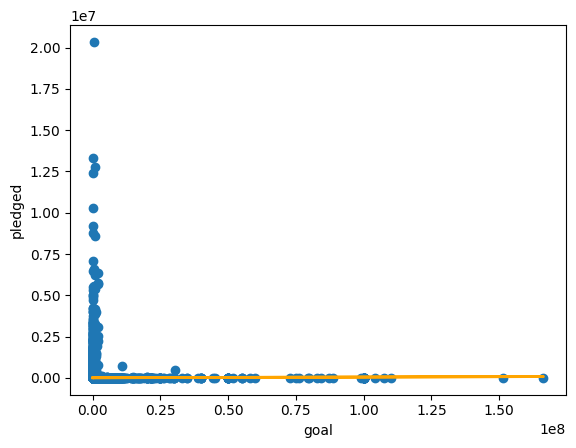

In [8]:
# Plot data with regression line
plt.scatter(X, y)
plt.plot(X, y_hat, '-', color='orange', linewidth=2)
plt.ylabel('pledged')
plt.xlabel('goal')

In [9]:
# Define features and target variable
X = df[['goal']]
y = df['pledged']

# Apply logarithmic transformation to 'goal' and 'pledged' columns
X['goal'] = np.log1p(X['goal'])  # log1p is used to handle zero values
y = np.log1p(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

C:\Users\vandi\AppData\Local\Temp\ipykernel_6124\567717599.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['goal'] = np.log1p(X['goal'])  # log1p is used to handle zero values


LinearRegression()

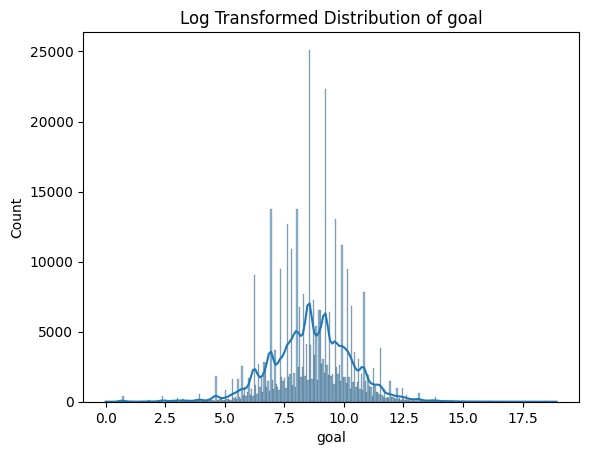

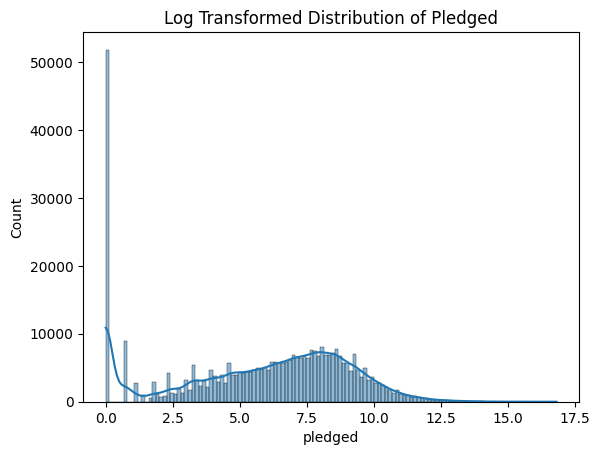

In [10]:
# Examine distributions after log transformation
for col in ['goal']:
    sns.histplot(X[col], kde=True)
    plt.title(f'Log Transformed Distribution of {col}')
    plt.show()
    
sns.histplot(y, kde=True)
plt.title('Log Transformed Distribution of Pledged')
plt.show()

In [11]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Inverse transform the predictions to the original scale
y_pred_original_scale = np.expm1(y_pred)  # Inverse of log1p is expm1
y_test_original_scale = np.expm1(y_test)

# Evaluating the model with original target values
mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
print(f'Mean Squared Error (Original Scale): {mse_original_scale}')

Mean Squared Error: 10.75701445698482
Mean Squared Error (Original Scale): 5063260500.083876
